In [1]:
import os
from dotenv import load_dotenv

In [2]:
import pandas as pd

In [3]:
import alpaca_trade_api as tradeapi

In [4]:
load_dotenv('../../../../ALPACA/.env')

True

In [5]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRETE_KEY')
                              
display(type(alpaca_api_key))
display(type(alpaca_secret_key))                              

str

str

In [6]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [7]:
tickers = [
    'TSLA',
    'KO'
]

In [8]:
timeframe = '1Day'

In [9]:
start_date = pd.Timestamp(
    '2019-05-01',
    tz='America/New_York'
).isoformat()



end_date = pd.Timestamp(
    '2020-05-01',
    tz= 'America/New_York'
).isoformat()


In [13]:
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df

TSLA = prices_df[prices_df['symbol'] == 'TSLA'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol'] == 'KO'].drop('symbol', axis=1)

prices_df = pd.concat(
    [TSLA, KO],
    axis=1,
    keys= ['TSLA', 'KO']
)

In [14]:
prices_df

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-05-01 04:00:00+00:00  238.85  240.0000  231.50  234.01  10704355   
2019-05-02 04:00:00+00:00  245.52  247.1300  237.72  244.10  18167261   
2019-05-03 04:00:00+00:00  243.86  256.6100  243.49  255.03  23740838   
2019-05-06 04:00:00+00:00  250.02  258.3499  248.50  255.34  10860343   
2019-05-07 04:00:00+00:00  256.80  257.2100  245.10  247.06  10261408   
...                           ...       ...     ...     ...       ...   
2020-04-27 04:00:00+00:00  737.61  799.4900  735.00  798.75  20681442   
2020-04-28 04:00:00+00:00  795.64  805.0000  756.69  769.12  15222719   
2020-04-29 04:00:00+00:00  790.17  803.1999  783.16  800.51  16215982   
2020-04-30 04:00:00+00:00  855.19  869.8200  763.50  781.88  28471861   
2020-05-01 04:00:00+00:00  755.00  772.7700  683.04  701.32  32531807   

                                                      KO                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2019-05-01 04:00:00+00:00      108382  234.544288  48.95  49.0750  48.55   
2019-05-02 04:00:00+00:00      173521  242.763484  48.53  48.7657  48.27   
2019-05-03 04:00:00+00:00      205076  252.330502  48.60  48.9600  48.52   
2019-05-06 04:00:00+00:00       93066  254.021222  48.33  48.6100  48.26   
2019-05-07 04:00:00+00:00      103693  249.863277  48.23  48.2900  47.77   
...                               ...         ...    ...      ...    ...   
2020-04-27 04:00:00+00:00      433976  783.972936  46.00  46.9750  45.71   
2020-04-28 04:00:00+00:00      313311  776.861887  48.00  48.0000  46.57   
2020-04-29 04:00:00+00:00      369253  806.509262  47.27  47.8600  46.88   
2020-04-30 04:00:00+00:00      615141  814.176323  47.00  47.0000  45.70   
2020-05-01 04:00:00+00:00      728692  719.404683  45.62  46.3900  45.21   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2019-05-01 04:00:00+00:00  48.59  10551594       55430  48.792137  
2019-05-02 04:00:00+00:00  48.39   8724932       49477  48.453170  
2019-05-03 04:00:00+00:00  48.72   7076949       39003  48.773171  
2019-05-06 04:00:00+00:00  48.47   8658209       44597  48.465858  
2019-05-07 04:00:00+00:00  48.00  12487481       59828  48.012280  
...                          ...       ...         ...        ...  
2020-04-27 04:00:00+00:00  46.78  19175538      124750  46.501889  
2020-04-28 04:00:00+00:00  46.74  17246696      119237  47.136381  
2020-04-29 04:00:00+00:00  47.12  15780000      112218  47.381482  
2020-04-30 04:00:00+00:00  45.89  20801092      142157  46.036240  
2020-05-01 04:00:00+00:00  45.60  14290418      104457  45.640609  

[254 rows x 14 columns]

In [17]:
closing_prices_df = pd.DataFrame()

closing_prices_df['KO']= prices_df['KO']['close']
closing_prices_df['TSLA'] = prices_df['TSLA']['close']

closing_prices_df.index = closing_prices_df.index.date

closing_prices_df

,KO,TSLA
2019-05-01,48.59,234.01
2019-05-02,48.39,244.10
2019-05-03,48.72,255.03
2019-05-06,48.47,255.34
2019-05-07,48.00,247.06
...,...,...
2020-04-27,46.78,798.75
2020-04-28,46.74,769.12
2020-04-29,47.12,800.51
2020-04-30,45.89,781.88


In [19]:
daily_returns_df = closing_prices_df.pct_change().dropna()
daily_returns_df.head()

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986


In [20]:
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000059,0.005515
std,0.019557,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


<AxesSubplot: title={'center': 'KO Probability Distribution'}, ylabel='Frequency'>

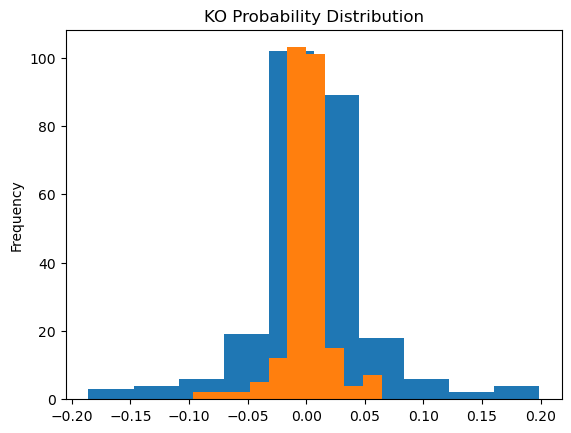

In [31]:
daily_returns_df['TSLA'].plot.hist(
    title='TSLA Probability Distribution'
)

daily_returns_df['KO'].plot.hist(
    title = 'KO Probability Distribution'
)

<AxesSubplot: ylabel='Density'>

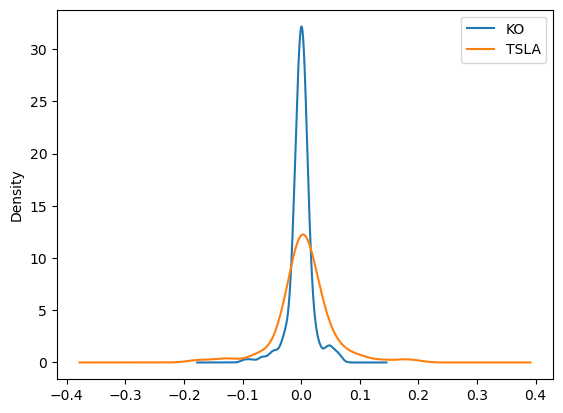

In [24]:
daily_returns_df.plot.density()